<a name="top"></a>
## Contents

* [Setup](#Setup)
* [References](#References)
* [CIGTAB1](#CIGTAB1)
* [CIGTAB2](#CIGTAB2)

<a id="top"></a>

## Setup

In this notebook, we will run the MOCMA optimizer for functions in the CIGTAB family.

For each function, we will run 4 different configurations of the MOCMA optimizer for 5 trials with a maximum of 50.000 function evaluations.

In [1]:
import dataclasses

import math
import numpy as np

from anguilla.fitness.base import ObjectiveFunction
from anguilla.fitness import benchmark

from experiment import TrialParameters, run_trials, population_plot_2d, pareto_front_plot_2d, runtime_summary, volume_summary

In [2]:
# 1) Configurable global settings

# Number of trials
N_TRIALS = 5

# Number of dimensions
N_DIMENSIONS = 10

# Number of parents
N_PARENTS = 20

INITIAL_STEP_SIZE = 1.0

# For reproducible results we set a base seed to create the seed 
# sequence used to generate children seeds for each independent trial
SEED = 57567486554

# Maximum number of evaluations to run the optimizer for
MAX_EVALUATIONS = 50000

# 2) Other global values

# Store common parameters which are customized using dataclasses.replace
def get_base_params(fn_cls: ObjectiveFunction):
    return TrialParameters(
                fn_cls,
                fn_args=(N_DIMENSIONS,),
                n_parents=N_PARENTS,
                initial_step_size=INITIAL_STEP_SIZE,
                max_evaluations=MAX_EVALUATIONS,
                region_bounds=(-10.0, 10.0),
            )

def run(fn_cls: ObjectiveFunction, **parameter_replacements: dict):
    params = dataclasses.replace(get_base_params(fn_cls), **parameter_replacements)
    results = run_trials(params, seed=SEED, n_trials=N_TRIALS)
    runtime_summary(results)
    volume_summary(results)
    return population_plot_2d(results)

## CIGTAB1
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 22.46s, ask = 18.47s, tell = 2.72s, eval = 1.27s
No reference point was provided.


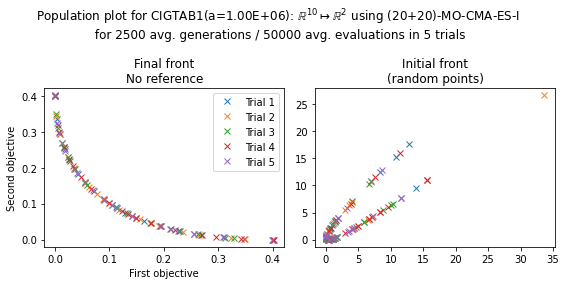

In [5]:
fig = run(benchmark.CIGTAB1, success_notion="individual")

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 27.52s, ask = 22.66s, tell = 3.31s, eval = 1.55s
No reference point was provided.


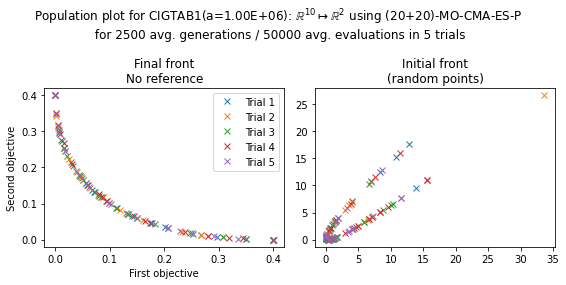

In [6]:
fig = run(benchmark.CIGTAB1)

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 48.70s, ask = 25.10s, tell = 15.56s, eval = 8.04s
No reference point was provided.


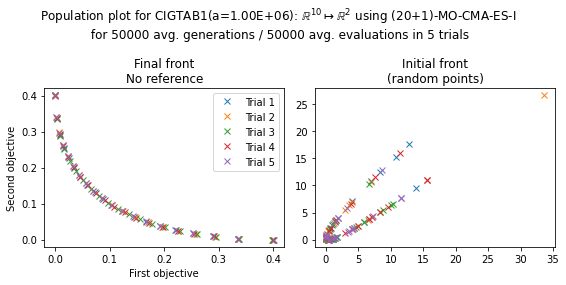

In [3]:
fig = run(benchmark.CIGTAB1, success_notion="individual", n_offspring=1)

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 46.74s, ask = 24.54s, tell = 14.46s, eval = 7.74s
No reference point was provided.


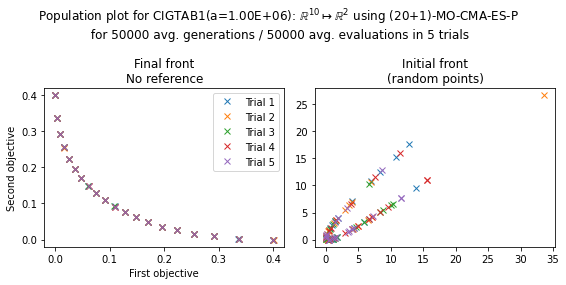

In [4]:
fig = run(benchmark.CIGTAB1, n_offspring=1)

## CIGTAB2
[Back to top](#top)

### Individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 69.14s, ask = 58.08s, tell = 7.21s, eval = 3.86s
No reference point was provided.


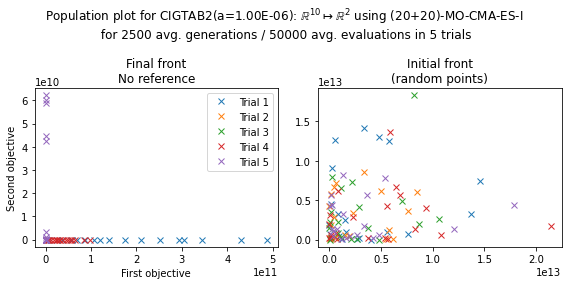

In [6]:
fig = run(benchmark.CIGTAB2, success_notion="individual", fn_kwargs={'a':1e-6})

### Population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 25.51s, ask = 21.36s, tell = 2.68s, eval = 1.47s
No reference point was provided.


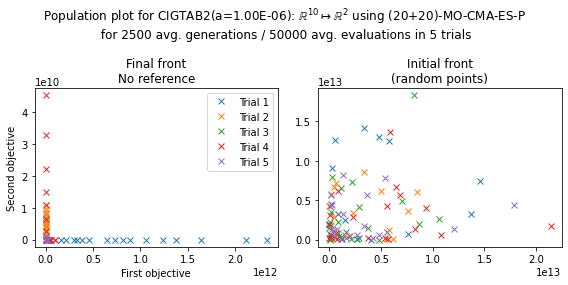

In [9]:
fig = run(benchmark.CIGTAB2, fn_kwargs={'a':1e-6})

### Steady-state, individual-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 62.33s, ask = 32.26s, tell = 19.92s, eval = 10.14s
No reference point was provided.


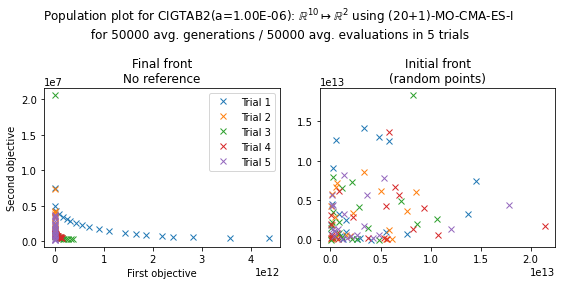

In [7]:
fig = run(benchmark.CIGTAB2, success_notion="individual", n_offspring=1, fn_kwargs={'a':1e-6})

### Steady-state, population-based

Running 5 trials using 5 processes with chunk size of 1.
Average wall-clock time: total = 67.46s, ask = 34.81s, tell = 21.64s, eval = 11.01s
No reference point was provided.


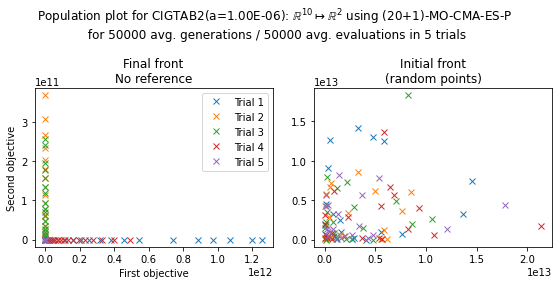

In [8]:
fig = run(benchmark.CIGTAB2, n_offspring=1, fn_kwargs={'a':1e-6})

## References
[Back to top](#top)

[1] C. Igel, N. Hansen, and S. Roth. Covariance matrix adaptation for multi-objective optimization. Evolutionary Computation, 15(1):1–28, 2007. doi:10.1162/evco.2007.15.1.1.